# **TEMA 1: FAMILIARIZACIÓN Y LIMPIEZA DE DATOS**


Industria de Telecomunicaciones: Venta de productos de telefonía celular 
*   Importancia 


> ¿Cómo impactan mis ventas en las diferentes áreas? :

> Procesos: _____________________________________________________________________


> Finanzas: _____________________________________________________________________

> Marketing:_____________________________________________________________________

*   10 puntos de venta
*   34 productos distintos
*   9 meses de registro

* **Datos del ejercicio**

> pdv_id: Punto de venta (1: Galerías Toluca, 2: Artz, etc.)

> mes: Mes en el que se hicieron las ventas

> mes_id: Mes en el que se hicieron las ventas (1: Enero, 2: Febrero, 3: Marzo, etc.)

> sku_id: Idenetificador de productos

> ventas_totales: Ventas en cada punto de venta, de cada producto, en cada mes de registro.

> ventas_totales_en_tienda_de_cada_mes: Ventas totales que tuvo la tienda en cada mes de registro. 

> ventas_totales_1_mes_pasado_ Ventas que tuvo la tienda, de cada producto, el mes pasado.

> promedio_ventas_totales_por_sku_en_cada_mes: En promedio cuantas unidades de cada producto estoy vendido por mes


## Valores perdidos

In [1]:
# Paquetería 
import pandas as pd

In [2]:
# Conexión con google drive - No olvidar entrar a la liga con la llave
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/DIPLOMADO_CIENCIA_DE_DATOS_FJ2020/Diplomado_GJulio22/Sesion_1"

Mounted at /content/drive
/content/drive/MyDrive/DIPLOMADO_CIENCIA_DE_DATOS_FJ2020/Diplomado_GJulio22/Sesion_1


In [3]:
# Lectura de Datos 
datos = pd.read_csv("datos_tema1.csv")
datos.head()

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado,promedio_ventas_totales_por_sku_en_cada_mes
0,1,enero,1.0,1,2,23.0,2.0,NaN
1,1,NaN,2.0,1,0,27.0,2.0,NaN
2,1,marzo,3.0,1,1,28.0,0.0,NaN
3,1,abril,4.0,1,0,31.0,1.0,NaN
4,1,mayo,NaN,1,0,37.0,0.0,NaN


In [4]:
datos.shape

(3060, 8)

**¿Cómo detectar Nan?**

In [ ]:
#pd.isnull() dentro del paréntesis el nombre del dataframe
pd.isnull(datos)

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado,promedio_ventas_totales_por_sku_en_cada_mes
0,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...
3055,False,False,False,False,False,False,False,True
3056,False,False,False,False,False,False,False,True
3057,False,False,False,False,False,False,False,True
3058,False,False,False,False,False,False,False,True


In [ ]:
# Para saber el total, al comando anterior le agregamos .sum()
pd.isna(datos).sum()

pdv_id                                            0
mes                                             340
mes_id                                           37
sku_id                                            0
ventas_totales                                    0
ventas_totales_en_tienda_de_cada_mes             31
ventas_totales_1_mes_pasado                       2
promedio_ventas_totales_por_sku_en_cada_mes    3060
dtype: int64

In [ ]:
# Por el momento, vamos a eliminar la última columna con el comando dataframe.drop(['columna'], axis=1), no olvidar guardar los cambios
#datos_tema1 = datos.drop(['promedio_ventas_totales_por_sku_en_cada_mes'], axis = 1) #añadir columns 

datos_tema1 = datos.drop(['promedio_ventas_totales_por_sku_en_cada_mes'], axis = 1)
datos_tema1.head()

### Drop por # de columna

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
0,1,enero,1.0,1,2,23.0,2.0
1,1,NaN,2.0,1,0,27.0,2.0
2,1,marzo,3.0,1,1,28.0,0.0
3,1,abril,4.0,1,0,31.0,1.0
4,1,mayo,NaN,1,0,37.0,0.0


In [ ]:
# Si quisiera ver los renglones que tienen NaN puedo utilizar el siguiente código 
pd.set_option('display.max_rows', 500) #cuantos renglones se pueden mostrar
true_false = datos_tema1.isnull() #datos con valores nulos - igual que la primera visualización
renglones_true = true_false.any(axis=1) #etiqueta los valores renglones que tienen valores nulos, donde encontremos un True, pon True
datos_tema1[renglones_true]#.head() #410 renglones #filtro

**¿Qué podemos hacer?**


> Opción 0: Eliminar


> Opción 1: Imputar valores



In [ ]:
# Opción 0: Quitar renglones que tienen NA dataframe.dropna(axis=0), axis = 0:filas, 1:columnas
na_1 = datos_tema1.dropna(axis=0)
na_1.shape

(2650, 7)

In [ ]:
na_2 = datos_tema1.dropna(axis=1)
na_2.shape

(3060, 3)

In [ ]:
# Eliminar renglones de una columna en particular, solamente tiene 2 valores vacíos, entonces quitamos esos renglones nada más. 
# dataframe.dropna(subset = [variable], axis = 0)


In [ ]:
# Opción 1: En la segunda columna (mes), todos los NaN corresponden al mes con id = 2,  "Febrero"
# Imputar valor categórico / string, dataframe['columna'].fillna('valor a imputar', inplace = True)

datos_tema1['mes'].fillna('febrero', inplace = True)

In [ ]:
# verificamos que no haya nulos en mes
pd.isna(datos_tema1).sum()

pdv_id                                   0
mes                                      0
mes_id                                   0
sku_id                                   0
ventas_totales                           0
ventas_totales_en_tienda_de_cada_mes    31
ventas_totales_1_mes_pasado              2
dtype: int64

In [ ]:
# Opción 1: En la columna 3 (mes_id), todos los Nan corresponden al mes de mayo (5)
# Imputar valores numéricos dataframe['columna'].fillna(valor a imputar, inplace = True)
datos_tema1['mes_id'].fillna(5, inplace = True)

In [ ]:
#datos_tema1.head(50)

In [ ]:
# Opción 1: Columna 6 (ventas totales en la tienda en cada mes)

# Primero vamos a ver de nuevo los registros, todos los valores que hacen falta corresponden a las ventas que se hicieron en el punto de venta 1, en el mes de enero
#pd.set_option('display.max_rows', 500)
#true_false = datos_tema1.isnull()
#renglones_true = true_false.any(axis=1)
#datos_tema1[renglones_true] 

# Vamos a calcular cuantas ventas hubo por punto de venta y mes, dataframe['columna para guardar calculos'] = dataframe.groupby(['variable', 'variable2', 'mes_id']).variable_de_interes.transform('sum'), también puede ser mean


datos_tema1['ventas_totales_en_tienda_de_cada_mes'] =datos_tema1.groupby(['pdv_id','mes', 'mes_id']).ventas_totales.transform('sum')

datos_tema1.loc[datos_tema1['mes'] == 'enero']


In [ ]:
# verificamos valores nulos
pd.isnull(datos_tema1).sum()

pdv_id                                  0
mes                                     0
mes_id                                  0
sku_id                                  0
ventas_totales                          0
ventas_totales_en_tienda_de_cada_mes    0
ventas_totales_1_mes_pasado             0
dtype: int64

In [ ]:
true_false = datos_tema1.isnull()
renglones_true = true_false.any(axis=1)
datos_tema1[renglones_true] 

# ¿Qué vamos a hacer?
# Con la tabla de desliegue de datos_tema1  anterior podemos ver que podría ser 2 el valor a imputar
# Pero podríamos indagar más, preguntar a los encargados, pedir más información a los departamentos

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
9,1,enero,1.0,2,5,23,NaN
18,1,enero,1.0,3,4,23,NaN


In [ ]:
# Opción 1: Nan con 2
#datos_tema1['ventas_totales_1_mes_pasado'].fillna(2, inplace=True)


# Opción 1: Nan con mediana de la columna 
datos_tema1 = datos_tema1.fillna(datos_tema1.median())


# Opción 1: Nan en variable categorica - con moda
#datos_tema1['mes'].fillna(datos_tema1['mes'].value_counts().idxmax(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
datos_tema1.describe()

,pdv_id,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
count,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,5.500000,5.000000,17.500000,0.264379,8.988889,0.250980
std,2.872751,2.582411,9.812312,0.860889,9.526372,0.831161
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,9.000000,0.000000,2.000000,0.000000
50%,5.500000,5.000000,17.500000,0.000000,7.000000,0.000000
75%,8.000000,7.000000,26.000000,0.000000,12.000000,0.000000
max,10.000000,9.000000,34.000000,12.000000,43.000000,12.000000


# **TEMA 2: TRATAMIENTO DE VARIABLES E INGENIERÍA DE CARACTERÍSTICAS**

Industria de Telecomunicaciones: Venta de productos de telefonía celular 

*   Importancia 

> ¿Cuál es el desempeño de mis vendedores considerando sus ingresos por ventas y algunas otras variables? 

> Procesos: _____________________________________________________________________


> Finanzas: _____________________________________________________________________

> Marketing:_____________________________________________________________________

*   10 vendedores
*   34 productos distintos
*   9 meses de registro

* **Datos del ejercicio**

> Tiempo completo: Vendedor de tiempo completo o no. 

> Id_personal: Clave de única para cada vendedor

> mes: Mes en el que se hicieron las ventas (Enero - Julio 2021)

> mes_id: Mes en el que se hicieron las ventas (1: Enero, 2: Febrero, 3: Marzo, etc.)

> sku_id: Idenetificador de productos

> ventas_totales: Ventas de cada vendedor, de cada producto, en cada mes de registro (2020).

> ingresos año pasado: Ingresos de los vendedores (2021)

> Calificación servicio: Regular / Excelente / Malo

> Comentarios adicionales: Comentarios con respecto al desempeño de los vendedores y el trato con los clientes. 

> Fecha de Contratación: Fecha en la que contrataron al vendedor. 


**Ajuste: Vamos a considerar que los datos son de 2021, por lo tanto, eliminar los renglones equivalentes al mes 8 y 9 para aterrizarlo a un contexto más actual, por lo tanto, la columna de ingresos, corresponde a los ingresos del año actual.**




In [ ]:
# Lectura de datos
datos2 = pd.read_csv("datos_tema2.csv")
datos2.head()

,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion
0,si,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012
1,si,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012
2,si,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012
3,si,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012
4,si,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012


In [ ]:
datos2 = datos2[(datos2['mes_id'] < 8)]
datos2.shape

(2380, 10)

In [ ]:
#datos numéricos - vamos a enfocarnos en ingresos
# ¿qué pueden ver con los ingresos? ¿Ingresos negativos? ¿Mediana: 16,000 y valor máximo de 1,440,000? 
# valores atípicos
datos2.describe()

,id_personal,mes_id,sku_id,ventas_totales,ingresos_anio_pasado
count,2380.000000,2380.00000,2380.00000,2380.000000,2.380000e+03
mean,5.500000,4.00000,17.50000,10.049580,1.707723e+04
std,2.872885,2.00042,9.81277,6.078655,3.633706e+04
min,1.000000,1.00000,1.00000,0.000000,-1.000000e+03
25%,3.000000,2.00000,9.00000,5.000000,8.000000e+03
50%,5.500000,4.00000,17.50000,10.000000,1.600000e+04
75%,8.000000,6.00000,26.00000,15.000000,2.400000e+04
max,10.000000,7.00000,34.00000,50.000000,1.440000e+06


## Valores atípicos

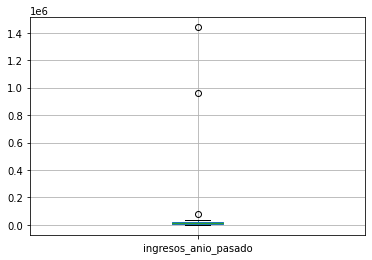

In [ ]:
# construir un boxplot dataframe.boxplot(colum=['columna a graficar'])
boxplot = datos2.boxplot(column=['ingresos_anio_pasado'])
boxplot

In [ ]:
# DESVIACIÓN ESTÁNDAR
#Detección con desviación estándar (Distancia de observación a la media > X*Desviación Estándar -> Valor atípico)
#If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
#There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.

factor = 3 #probar con 2 y 3
upper_lim = datos2['ingresos_anio_pasado'].mean() + datos2['ingresos_anio_pasado'].std()*factor
print(upper_lim)
lower_lim = datos2['ingresos_anio_pasado'].mean() - datos2['ingresos_anio_pasado'].std()*factor
print(lower_lim)

# Valores que están fuera de estos límites

datos2[(datos2['ingresos_anio_pasado'] > upper_lim) | (datos2['ingresos_anio_pasado'] < lower_lim)]


126088.41861285141
-91933.96483133882


,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion
40,si,1,mayo,5,5,6,960000,Excelente,amable servicial,27/06/2012
192,si,1,abril,4,22,9,1440000,Excelente,amable servicial,27/06/2012


In [ ]:
# Opción 1: Eliminarlos considerando Desviación estándar

data2_1 = datos2[(datos2['ingresos_anio_pasado'] < upper_lim) & (datos2['ingresos_anio_pasado'] > lower_lim)]
data2_1.shape

(2378, 10)

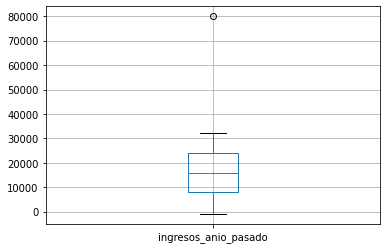

In [ ]:
boxplot = data2_1.boxplot(column=['ingresos_anio_pasado'])
boxplot

In [ ]:
# PERCENTILES
# Igual que en el caso anterior, pero considerando percentiles y eliminarlos

# Opción 2: Eliminarlos considerando percentiles 
upper_lim = datos2['ingresos_anio_pasado'].quantile(.95)
print(upper_lim)
lower_lim = datos2['ingresos_anio_pasado'].quantile(.05)
print(lower_lim)

#datos2[(datos2['ingresos_anio_pasado'] > upper_lim) | (datos2['ingresos_anio_pasado'] < lower_lim)].shape #eliminar 290

data2_2 = datos2[(datos2['ingresos_anio_pasado'] < upper_lim) & (datos2['ingresos_anio_pasado'] > lower_lim)]
data2_2.shape

30400.0
1600.0


(1942, 10)

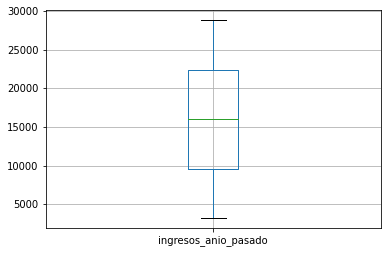

In [ ]:
boxplot = data2_2.boxplot(column=['ingresos_anio_pasado'])
boxplot

In [ ]:
data2_2.describe()

,id_personal,mes_id,sku_id,ventas_totales,ingresos_anio_pasado
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,5.487642,3.994851,17.652420,9.982492,15971.987642
std,2.875146,2.012320,9.787289,4.916375,7866.199355
min,1.000000,1.000000,1.000000,2.000000,3200.000000
25%,3.000000,2.000000,9.000000,6.000000,9600.000000
50%,5.000000,4.000000,18.000000,10.000000,16000.000000
75%,8.000000,6.000000,26.000000,14.000000,22400.000000
max,10.000000,7.000000,34.000000,18.000000,28800.000000


In [ ]:
# PROCESO ARTESANAL

# Opción 3: Invetsiga la causa raíz - regresamos

datos2.describe() # consideramos la media: 17,077, mediana: 16,000 y el percentil 75: 24,00


,id_personal,mes_id,sku_id,ventas_totales,ingresos_anio_pasado
count,2380.000000,2380.00000,2380.00000,2380.000000,2.380000e+03
mean,5.500000,4.00000,17.50000,10.049580,1.707723e+04
std,2.872885,2.00042,9.81277,6.078655,3.633706e+04
min,1.000000,1.00000,1.00000,0.000000,-1.000000e+03
25%,3.000000,2.00000,9.00000,5.000000,8.000000e+03
50%,5.500000,4.00000,17.50000,10.000000,1.600000e+04
75%,8.000000,6.00000,26.00000,15.000000,2.400000e+04
max,10.000000,7.00000,34.00000,50.000000,1.440000e+06


In [ ]:
datos2[(datos2['ingresos_anio_pasado'] > 35000 )] 
#probar con 30 y 40 mil, vamos con nóminas, ¿cómo se determina el pago? ventas*2000*0.80, a alguien se le fueron 0 demás (max unidades vendidas 18)


,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion
40,si,1,mayo,5,5,6,960000,Excelente,amable servicial,27/06/2012
192,si,1,abril,4,22,9,1440000,Excelente,amable servicial,27/06/2012
240,si,1,julio,7,27,50,80000,Excelente,servicial,27/06/2012


In [ ]:
#6*2000*0.80
9*2000*0.80
#50*2000*0.80 #efectivamente ganó 80 mil 

14400.0

In [ ]:
datos2.iloc[40,6] = 9600
datos2.iloc[40,:]

tiempo_completo                          si
id_personal                               1
mes                                   junio
mes_id                                    6
sku_id                                    6
ventas_totales                           18
ingresos_anio_pasado                   9600
calificacion_servicio             Excelente
comentarios_adicionales    amable servicial
fecha_contratacion               27/06/2012
Name: 50, dtype: object

In [ ]:
datos2.iloc[192,6] = 14400

In [ ]:
# El 80 podemos seguir con el, si es un valor veridico. 

## Transformación logística (Y), escalamiento y normalización

In [ ]:
# Transformación logarítmica
datos2['ingresos_anio_pasado'].skew()
#the data is positively (rigth) Skewed and is far away from 0 (Normal). 

32.61079413118768

(array([803., 645., 928.,   0.,   0.,   1.]),
 array([    0, 10000, 20000, 40000, 50000, 60000, 80000]),
 <a list of 6 Patch objects>)

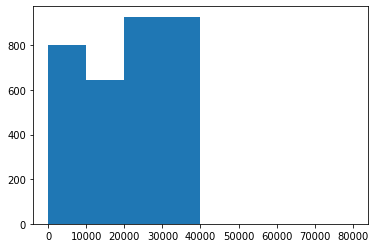

In [ ]:
import matplotlib.pyplot as plt
bins_list = [0, 10000, 20000, 40000, 50000, 60000, 80000]

plt.hist(datos2.ingresos_anio_pasado, bins = bins_list)


In [ ]:
import numpy as np
datos2['log+1'] = (datos2['ingresos_anio_pasado']+1).transform(np.log) #+1 porque log(0) no existe
datos2

,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1
0,si,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012,10.268165
1,si,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012,9.169623
2,si,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012,10.150387
3,si,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012,7.378384
4,si,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012,9.169623
...,...,...,...,...,...,...,...,...,...,...,...
3053,si,10,marzo,3,34,10,16000,Regular,despistado,17/05/2010,9.680406
3054,si,10,abril,4,34,6,9600,Regular,despistado tardado,17/05/2010,9.169623
3055,si,10,mayo,5,34,14,22400,Regular,lento servicial amigable,17/05/2010,10.016861
3056,si,10,junio,6,34,17,27200,Regular,lento,17/05/2010,10.211009


In [ ]:
datos2.describe()

,id_personal,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,log+1
count,2380.000000,2380.00000,2380.00000,2380.000000,2.380000e+03,2379.000000
mean,5.500000,4.00000,17.50000,10.049580,1.706916e+04,9.072976
std,2.872885,2.00042,9.81277,6.078655,3.633659e+04,2.125854
min,1.000000,1.00000,1.00000,0.000000,-1.000000e+03,0.000000
25%,3.000000,2.00000,9.00000,5.000000,8.000000e+03,8.987322
50%,5.500000,4.00000,17.50000,10.000000,1.600000e+04,9.680406
75%,8.000000,6.00000,26.00000,15.000000,2.400000e+04,10.085851
max,10.000000,7.00000,34.00000,50.000000,1.440000e+06,14.180154


(array([108.,   0.,   0.,   0.,   0.,   0.,   0., 102., 466., 905., 795.,
          1.,   0.,   1.,   1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

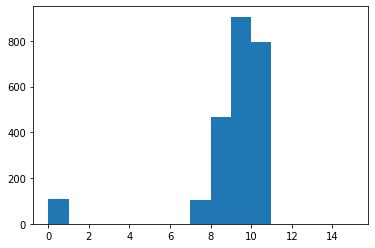

In [ ]:
bins_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
plt.hist(datos2['log+1'], bins = bins_list)

In [ ]:
# Pregunta: Si quisiera analizar los ingresos, ¿considero los 0?
# Proyectándonos al CRISPDM, todo empieza con una pregunta, un objetivo, predecir/estimar/analizar/encontrar/etc. 
# Supongamos que en este caso yo quiero predecir los ingresos de mis vendedores, ¿predecir ingresos de 0 me interesa? 

## Escalamiento: estandarización y normalización (X)

In [ ]:
#Normalización
#from sklearn.preprocessing import MixMaxScaler
#scaler = MinMaxScaler()
#scaled = scaler.fit_transform(datos)

In [ ]:
# Estandarización
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled = scaler.fit_transform(datos)

## Distribución de variables

In [ ]:
#¿Tenemos variables binarias? ¿Cuál? 
#¿Tenemos variables categóricas? ¿Cuál? 

In [ ]:
datos2

,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1
0,si,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012,10.268165
1,si,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012,9.169623
2,si,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012,10.150387
3,si,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012,7.378384
4,si,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012,9.169623
...,...,...,...,...,...,...,...,...,...,...,...
3053,si,10,marzo,3,34,10,16000,Regular,despistado,17/05/2010,9.680406
3054,si,10,abril,4,34,6,9600,Regular,despistado tardado,17/05/2010,9.169623
3055,si,10,mayo,5,34,14,22400,Regular,lento servicial amigable,17/05/2010,10.016861
3056,si,10,junio,6,34,17,27200,Regular,lento,17/05/2010,10.211009


In [ ]:
# TIEMPO COMPLETO (SI / NO)
# Variable binaria
pd.get_dummies(datos2,columns=['tiempo_completo'])

,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1,tiempo_completo_no,tiempo_completo_si
0,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012,10.268165,0,1
1,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012,9.169623,0,1
2,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012,10.150387,0,1
3,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012,7.378384,0,1
4,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012,9.169623,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3053,10,marzo,3,34,10,16000,Regular,despistado,17/05/2010,9.680406,0,1
3054,10,abril,4,34,6,9600,Regular,despistado tardado,17/05/2010,9.169623,0,1
3055,10,mayo,5,34,14,22400,Regular,lento servicial amigable,17/05/2010,10.016861,0,1
3056,10,junio,6,34,17,27200,Regular,lento,17/05/2010,10.211009,0,1


In [ ]:
datos2 = pd.get_dummies(datos2,columns=['tiempo_completo'])

# Eliminar 1 columna, dada la información redundante
datos2 = datos2.drop(['tiempo_completo_no'], axis=1)
datos2

,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1,tiempo_completo_si
0,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012,10.268165,1
1,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012,9.169623,1
2,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012,10.150387,1
3,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012,7.378384,1
4,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012,9.169623,1
...,...,...,...,...,...,...,...,...,...,...,...
3053,10,marzo,3,34,10,16000,Regular,despistado,17/05/2010,9.680406,1
3054,10,abril,4,34,6,9600,Regular,despistado tardado,17/05/2010,9.169623,1
3055,10,mayo,5,34,14,22400,Regular,lento servicial amigable,17/05/2010,10.016861,1
3056,10,junio,6,34,17,27200,Regular,lento,17/05/2010,10.211009,1


In [ ]:
# SERVICIO

encoded_columns = pd.get_dummies(datos2[['calificacion_servicio', 'mes']])
#encoded_columns
datos2_1 = datos2.join(encoded_columns)
datos2_1

#eliminar 1 columna

,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1,...,calificacion_servicio_Excelente,calificacion_servicio_Malo,calificacion_servicio_Regular,mes_abril,mes_enero,mes_febrero,mes_julio,mes_junio,mes_marzo,mes_mayo
0,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012,10.268165,...,0,0,1,0,1,0,0,0,0,0
1,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012,9.169623,...,1,0,0,0,0,1,0,0,0,0
2,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012,10.150387,...,1,0,0,0,0,0,0,0,1,0
3,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012,7.378384,...,1,0,0,1,0,0,0,0,0,0
4,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012,9.169623,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,10,marzo,3,34,10,16000,Regular,despistado,17/05/2010,9.680406,...,0,0,1,0,0,0,0,0,1,0
3054,10,abril,4,34,6,9600,Regular,despistado tardado,17/05/2010,9.169623,...,0,0,1,1,0,0,0,0,0,0
3055,10,mayo,5,34,14,22400,Regular,lento servicial amigable,17/05/2010,10.016861,...,0,0,1,0,0,0,0,0,0,1
3056,10,junio,6,34,17,27200,Regular,lento,17/05/2010,10.211009,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#onehot_encoder = OneHotEncoder(sparse=False)
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()

## Feature Split

In [ ]:
# ¿Cuál variable valdría la pena dividir en diferentes columnas?

In [ ]:
new = datos2['comentarios_adicionales'].str.split(" ", n = 2, expand = True) # 
new

,0,1,2
0,lento,servicial,amigable
1,servicial,None,None
2,atento,None,None
3,amable,servicial,None
4,servicial,None,None
...,...,...,...
3053,despistado,None,None
3054,despistado,tardado,None
3055,lento,servicial,amigable
3056,lento,None,None


## Fechas

In [ ]:
datos2

,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1,tiempo_completo_si
0,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012,10.268165,1
1,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012,9.169623,1
2,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012,10.150387,1
3,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012,7.378384,1
4,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012,9.169623,1
...,...,...,...,...,...,...,...,...,...,...,...
3053,10,marzo,3,34,10,16000,Regular,despistado,17/05/2010,9.680406,1
3054,10,abril,4,34,6,9600,Regular,despistado tardado,17/05/2010,9.169623,1
3055,10,mayo,5,34,14,22400,Regular,lento servicial amigable,17/05/2010,10.016861,1
3056,10,junio,6,34,17,27200,Regular,lento,17/05/2010,10.211009,1


In [ ]:
datos2.dtypes

id_personal                  int64
mes                         object
mes_id                       int64
sku_id                       int64
ventas_totales               int64
ingresos_anio_pasado         int64
calificacion_servicio       object
comentarios_adicionales     object
fecha_contratacion          object
log+1                      float64
tiempo_completo_si           uint8
dtype: object

In [ ]:
datos2['fecha_contratacion'] = pd.to_datetime(datos2.fecha_contratacion, format="%d/%m/%Y")
datos2.dtypes

id_personal                         int64
mes                                object
mes_id                              int64
sku_id                              int64
ventas_totales                      int64
ingresos_anio_pasado                int64
calificacion_servicio              object
comentarios_adicionales            object
fecha_contratacion         datetime64[ns]
log+1                             float64
tiempo_completo_si                  uint8
dtype: object

In [ ]:
# Extraer año
datos2['anio'] = datos2['fecha_contratacion'].dt.year
datos2

,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1,tiempo_completo_si,anio
0,1,enero,1,1,18,28800,Regular,lento servicial amigable,2012-06-27,10.268165,1,2012
1,1,febrero,2,1,6,9600,Excelente,servicial,2012-06-27,9.169623,1,2012
2,1,marzo,3,1,16,25600,Excelente,atento,2012-06-27,10.150387,1,2012
3,1,abril,4,1,1,1600,Excelente,amable servicial,2012-06-27,7.378384,1,2012
4,1,mayo,5,1,6,9600,Excelente,servicial,2012-06-27,9.169623,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
3053,10,marzo,3,34,10,16000,Regular,despistado,2010-05-17,9.680406,1,2010
3054,10,abril,4,34,6,9600,Regular,despistado tardado,2010-05-17,9.169623,1,2010
3055,10,mayo,5,34,14,22400,Regular,lento servicial amigable,2010-05-17,10.016861,1,2010
3056,10,junio,6,34,17,27200,Regular,lento,2010-05-17,10.211009,1,2010


In [ ]:
# Extraer mes
datos2['mes_contratacion'] = datos2['fecha_contratacion'].dt.month
datos2

,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1,tiempo_completo_si,anio,mes_contratacion
0,1,enero,1,1,18,28800,Regular,lento servicial amigable,2012-06-27,10.268165,1,2012,6
1,1,febrero,2,1,6,9600,Excelente,servicial,2012-06-27,9.169623,1,2012,6
2,1,marzo,3,1,16,25600,Excelente,atento,2012-06-27,10.150387,1,2012,6
3,1,abril,4,1,1,1600,Excelente,amable servicial,2012-06-27,7.378384,1,2012,6
4,1,mayo,5,1,6,9600,Excelente,servicial,2012-06-27,9.169623,1,2012,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,10,marzo,3,34,10,16000,Regular,despistado,2010-05-17,9.680406,1,2010,5
3054,10,abril,4,34,6,9600,Regular,despistado tardado,2010-05-17,9.169623,1,2010,5
3055,10,mayo,5,34,14,22400,Regular,lento servicial amigable,2010-05-17,10.016861,1,2010,5
3056,10,junio,6,34,17,27200,Regular,lento,2010-05-17,10.211009,1,2010,5


## Agrupamiento de variables

In [ ]:
# Reflexión de Binning
# Regresando a los datos del primer ejercicio, ¿cómo podríamos agrupar los sku? 

In [ ]:
datos2

,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion,log+1,tiempo_completo_si,anio,mes_contratacion
0,1,enero,1,1,18,28800,Regular,lento servicial amigable,2012-06-27,10.268165,1,2012,6
1,1,febrero,2,1,6,9600,Excelente,servicial,2012-06-27,9.169623,1,2012,6
2,1,marzo,3,1,16,25600,Excelente,atento,2012-06-27,10.150387,1,2012,6
3,1,abril,4,1,1,1600,Excelente,amable servicial,2012-06-27,7.378384,1,2012,6
4,1,mayo,5,1,6,9600,Excelente,servicial,2012-06-27,9.169623,1,2012,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,10,marzo,3,34,10,16000,Regular,despistado,2010-05-17,9.680406,1,2010,5
3054,10,abril,4,34,6,9600,Regular,despistado tardado,2010-05-17,9.169623,1,2010,5
3055,10,mayo,5,34,14,22400,Regular,lento servicial amigable,2010-05-17,10.016861,1,2010,5
3056,10,junio,6,34,17,27200,Regular,lento,2010-05-17,10.211009,1,2010,5


In [ ]:
# Group by
# Tablas pivote

datos2.pivot_table(index='id_personal', columns='mes_id', values='ingresos_anio_pasado', aggfunc=np.sum, fill_value = 0)

mes_id,1,2,3,4,5,6,7
id_personal,,,,,,,
1,555800,571200,566400,1947200,1388800,480000,640000
2,603200,502400,555200,611200,494400,489600,600000
3,595200,601600,556800,574400,612800,585600,513600
4,492800,542400,454400,526400,537600,662400,643200
5,571200,665600,515200,488000,598400,585600,604800
6,574400,537600,560000,422400,513600,544000,544000
7,396800,510400,472000,499200,598400,488000,564800
8,571200,673600,556800,532800,507200,486400,489600
9,534400,470400,564800,516800,504000,552000,569600


In [ ]:
#sum_cols: List of columns to sum
#mean_cols: List of columns to average
grouped = datos2.groupby('tiempo_completo_si')

sums = grouped['ingresos_anio_pasado'].sum().add_suffix('_sum')
avgs = grouped['ingresos_anio_pasado'].mean().add_suffix('_avg')

new_df = pd.concat([sums, avgs], axis=1)
new_df

,ingresos_anio_pasado,ingresos_anio_pasado
0_sum,11059200.0,NaN
1_sum,29584600.0,NaN
0_avg,NaN,15489.075630
1_avg,NaN,17757.863145


**Terminamos (:**